<a href="https://colab.research.google.com/github/JHON-EDV/Ahorcado-en-python/blob/master/Clasificacion_Spotify_HIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn


%matplotlib inline


spotify = pd.read_csv('https://raw.githubusercontent.com/JHON-EDV/Clasificacion_Spotify/master/data.csv',encoding='utf-8')

type(spotify)

pandas.core.frame.DataFrame

In [4]:
spotify.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [5]:
#Visualizamos la dimension de la base de datos
spotify.shape

(169909, 19)

In [6]:
#visualizamos las columnas
spotify.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [7]:
spotify.index

RangeIndex(start=0, stop=169909, step=1)

In [8]:
#Tipo de dato por columna
spotify.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [9]:
#Separacion por tipo de dato.
num = (spotify.dtypes == float) | (spotify.dtypes == int)
num.index

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [10]:
num_colms = [c for c in num.index if num[c]]
num_colms

['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo',
 'valence',
 'year']

In [11]:
obj = spotify.dtypes == object
obj_colms = [c for c in obj.index if obj[c]]
obj_colms

['artists', 'id', 'name', 'release_date']

In [12]:
spotify_num = spotify[num_colms]

In [13]:
spotify_num

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.9950,0.708,158648,0.1950,0,0.563000,10,0.1510,-12.428,1,0,0.0506,118.469,0.7790,1928
1,0.9940,0.379,282133,0.0135,0,0.901000,8,0.0763,-28.454,1,0,0.0462,83.972,0.0767,1928
2,0.6040,0.749,104300,0.2200,0,0.000000,5,0.1190,-19.924,0,0,0.9290,107.177,0.8800,1928
3,0.9950,0.781,180760,0.1300,0,0.887000,1,0.1110,-14.734,0,0,0.0926,108.003,0.7200,1928
4,0.9900,0.210,687733,0.2040,0,0.908000,11,0.0980,-16.829,1,1,0.0424,62.149,0.0693,1928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,0.1730,0.875,163800,0.4430,1,0.000032,1,0.0891,-7.461,1,75,0.1430,100.012,0.3060,2020
169905,0.0167,0.719,167468,0.3850,0,0.031300,8,0.1110,-10.907,1,64,0.0403,128.000,0.2700,2020
169906,0.5380,0.514,180700,0.5390,0,0.002330,7,0.1080,-9.332,1,70,0.1050,123.700,0.1530,2020
169907,0.0714,0.646,167308,0.7610,0,0.000000,1,0.2220,-2.557,1,70,0.0385,129.916,0.4720,2020


In [14]:
spotify_num.shape

(169909, 15)

Text(0.5, 1.0, 'Histogram of year')

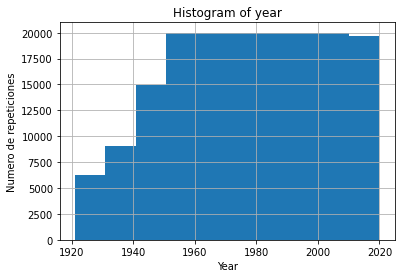

In [15]:
spotify_num['year'].hist()
plt.xlabel('Year')
plt.ylabel('Numero de repeticiones')
plt.title('Histogram of year')


Text(0.5, 1.0, 'Histogram of Popularity')

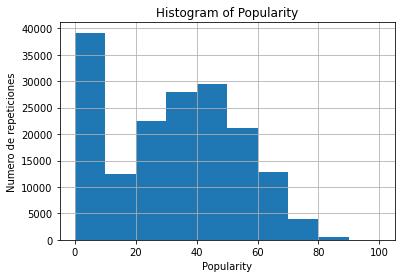

In [16]:
spotify_num['popularity'].hist()
plt.xlabel('Popularity')
plt.ylabel('Numero de repeticiones')
plt.title('Histogram of Popularity')

Aqui hay un problema, si queremos eliminar los primeros años. Los datos de estos son minimos, aunque se tiene una gran cantidad de casos en 0 

In [17]:
import seaborn as sns
%matplotlib inline

spotify_num.corr()
#correlación entre las columnas siendo 1 el maximo

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.265950,-0.079311,-0.750283,-0.253690,0.335821,-0.021686,-0.023871,-0.567072,0.046475,-0.593345,-0.056077,-0.204982,-0.185540,-0.624550
danceability,-0.265950,1.000000,-0.134500,0.220569,0.241891,-0.281429,0.022599,-0.105532,0.294170,-0.045306,0.221077,0.225305,-0.004872,0.560242,0.203430
duration_ms,-0.079311,-0.134500,1.000000,0.036396,-0.043811,0.084814,-0.003116,0.034270,-0.014687,-0.046981,0.063292,-0.058449,-0.028816,-0.198760,0.076293
energy,-0.750283,0.220569,0.036396,1.000000,0.142677,-0.287692,0.029984,0.126293,0.782982,-0.038355,0.497488,-0.045226,0.249936,0.350086,0.532419
explicit,-0.253690,0.241891,-0.043811,0.142677,1.000000,-0.138292,0.008578,0.039272,0.152695,-0.083221,0.214044,0.413074,0.011484,-0.022327,0.245227
instrumentalness,0.335821,-0.281429,0.084814,-0.287692,-0.138292,1.000000,-0.014268,-0.047397,-0.417033,-0.035051,-0.299829,-0.115735,-0.107570,-0.193929,-0.291571
key,-0.021686,0.022599,-0.003116,0.029984,0.008578,-0.014268,1.000000,-0.000106,0.021920,-0.112766,0.010675,0.015225,0.003148,0.029064,0.012503
liveness,-0.023871,-0.105532,0.034270,0.126293,0.039272,-0.047397,-0.000106,1.000000,0.052985,0.005393,-0.075293,0.147667,0.008124,-0.000426,-0.055839
loudness,-0.567072,0.294170,-0.014687,0.782982,0.152695,-0.417033,0.021920,0.052985,1.000000,-0.013147,0.466546,-0.105796,0.211114,0.308418,0.490118
mode,0.046475,-0.045306,-0.046981,-0.038355,-0.083221,-0.035051,-0.112766,0.005393,-0.013147,1.000000,-0.032854,-0.057493,0.014539,0.014727,-0.033084


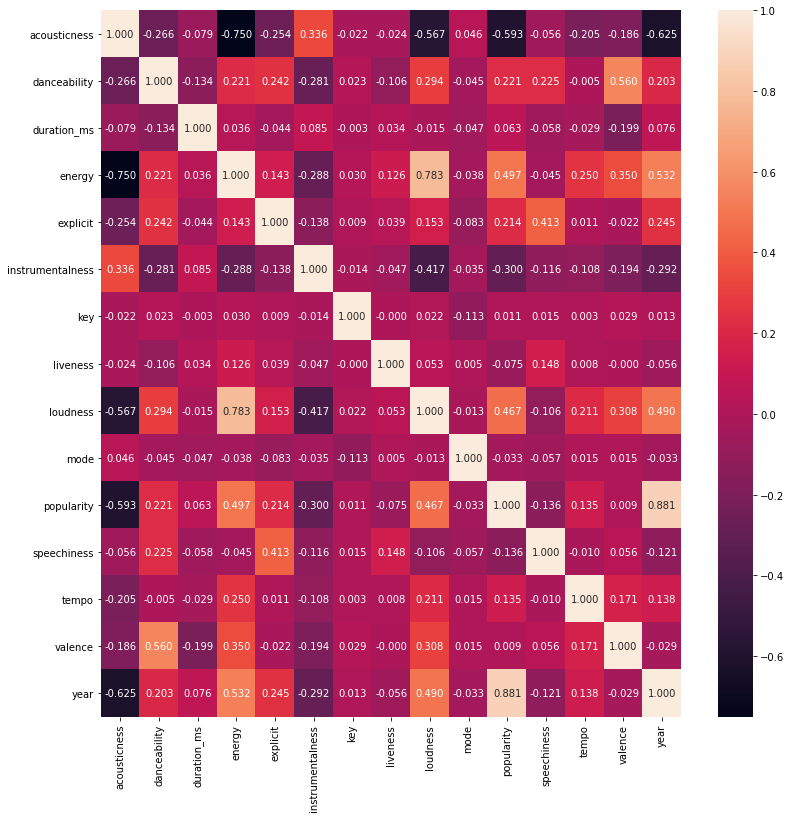

In [18]:
fig, ax = plt.subplots(figsize=(13,13))         # Sample figsize in inches
sns.heatmap(spotify_num.corr(), annot=True, fmt='.3f')


In [19]:
(spotify_num['year'] > 1960).value_counts()

True     119656
False     50253
Name: year, dtype: int64

In [20]:
(spotify_num['year'] > 1940).value_counts()

True     154574
False     15335
Name: year, dtype: int64

In [21]:
mask = spotify_num['year'] > 1960

In [22]:
spotify_num_1940 = spotify_num[mask]

In [23]:
spotify_num.shape

(169909, 15)

In [24]:
spotify_num_1940.shape

(119656, 15)

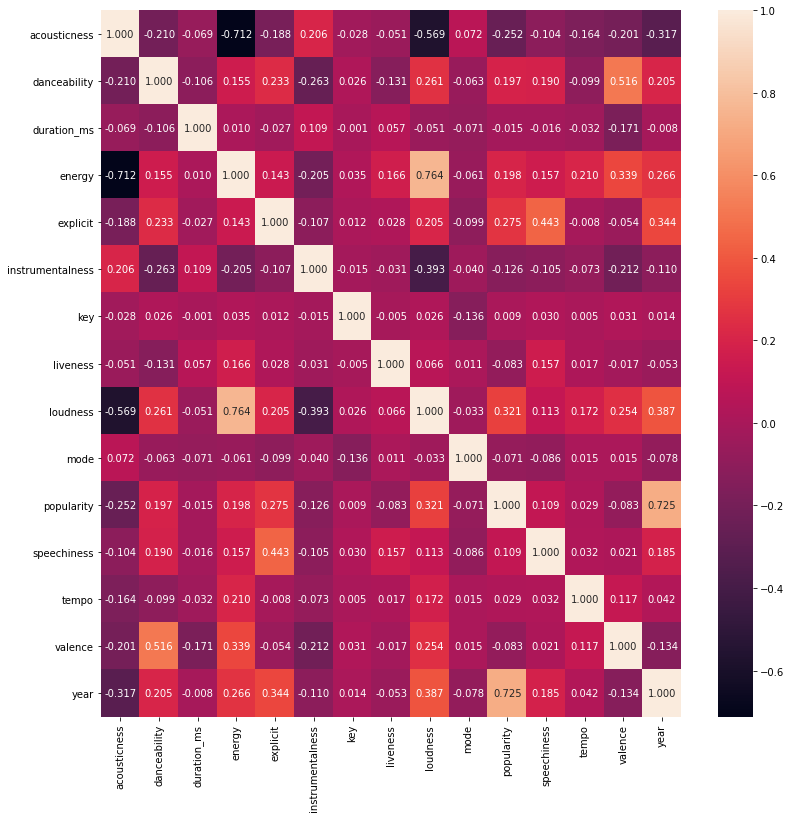

In [25]:
spotify_num.corr()
#correlación entre las columnas siendo 1 el maximo
fig, ax = plt.subplots(figsize=(13,13))         # Sample figsize in inches
sns.heatmap(spotify_num_1940.corr(), annot=True, fmt='.3f')

In [26]:
(spotify_num_1940['popularity'] > 80).value_counts()

False    119199
True        457
Name: popularity, dtype: int64

In [27]:
spotify_num_1940.shape

(119656, 15)

In [28]:
percent = (119199/119656)*100
percent

99.61807180584343

In [29]:
percent_true = (457/119656)*100
percent_true

0.3819281941565822

Text(0.5, 1.0, 'Histogram of Popularity')

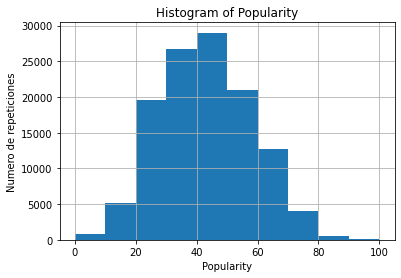

In [30]:
spotify_num_1940['popularity'].hist()
plt.xlabel('Popularity')
plt.ylabel('Numero de repeticiones')
plt.title('Histogram of Popularity')

Text(0.5, 1.0, 'Histogram of year')

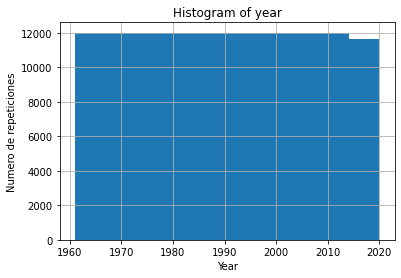

In [31]:
spotify_num_1940['year'].hist()
plt.xlabel('Year')
plt.ylabel('Numero de repeticiones')
plt.title('Histogram of year')

In [32]:
spotify_num_1940.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,119656.000000,119656.000000,1.196560e+05,119656.000000,119656.000000,119656.000000,119656.000000,119656.000000,119656.000000,119656.000000,119656.000000,119656.000000,119656.000000,119656.000000,119656.000000
mean,0.342830,0.556205,2.384627e+05,0.578087,0.103179,0.104070,5.225496,0.202915,-9.873729,0.709166,42.400423,0.076758,119.895590,0.542732,1990.419110
std,0.323012,0.172962,1.063395e+05,0.246520,0.304194,0.251717,3.537406,0.181097,5.036224,0.454149,14.997266,0.092404,30.032776,0.258144,17.276737
min,0.000000,0.000000,1.470800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1961.000000
25%,0.040900,0.440000,1.817330e+05,0.400000,0.000000,0.000000,2.000000,0.093700,-12.455000,0.000000,31.000000,0.033500,96.581000,0.337000,1975.000000
50%,0.238000,0.564000,2.227800e+05,0.596000,0.000000,0.000056,5.000000,0.129000,-8.956000,1.000000,42.000000,0.043300,117.878500,0.552000,1990.000000
75%,0.622000,0.681000,2.715765e+05,0.780000,0.000000,0.011900,8.000000,0.256000,-6.218000,1.000000,53.000000,0.071900,138.666250,0.758000,2005.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.744000,1.000000,100.000000,0.964000,244.091000,1.000000,2020.000000


In [34]:
spotify_num_1940.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
2154,0.729,0.497,377600,0.263,0,0.0978,5,0.146,-18.366,1,15,0.0351,109.284,0.414,1961
2155,0.491,0.668,204627,0.453,0,0.7740,2,0.565,-16.417,1,13,0.0535,97.732,0.354,1961
2156,0.961,0.275,187933,0.110,0,0.8880,7,0.108,-20.325,1,13,0.0356,166.733,0.466,1961
2157,0.954,0.337,447453,0.130,0,0.6980,3,0.320,-15.557,1,16,0.0403,58.813,0.200,1961
2158,0.789,0.466,247133,0.205,0,0.0000,5,0.099,-12.981,1,10,0.0315,84.211,0.502,1961


In [35]:
spotify_num_1940.notnull().apply(pd.Series.value_counts)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
True,119656,119656,119656,119656,119656,119656,119656,119656,119656,119656,119656,119656,119656,119656,119656


In [36]:
(spotify_num_1940 != 0).apply(pd.Series.value_counts)

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
False,13,91,NaN,3,107310,36548,15014,5,NaN,34800,78,92,91,96,NaN
True,119643,119565,119656.0,119653,12346,83108,104642,119651,119656.0,84856,119578,119564,119565,119560,119656.0


In [95]:
spotify_num_1940.index = np.arange(0,len(spotify_num_1940), 1)

In [96]:
spotify_num_1940.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            119646, 119647, 119648, 119649, 119650, 119651, 119652, 119653,
            119654, 119655],
           dtype='int64', length=119656)

In [98]:
spotify_num_1940

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,0.7290,0.497,377600,0.263,0,0.097800,5,0.1460,-18.366,1,15,0.0351,109.284,0.414,1961
1,0.4910,0.668,204627,0.453,0,0.774000,2,0.5650,-16.417,1,13,0.0535,97.732,0.354,1961
2,0.9610,0.275,187933,0.110,0,0.888000,7,0.1080,-20.325,1,13,0.0356,166.733,0.466,1961
3,0.9540,0.337,447453,0.130,0,0.698000,3,0.3200,-15.557,1,16,0.0403,58.813,0.200,1961
4,0.7890,0.466,247133,0.205,0,0.000000,5,0.0990,-12.981,1,10,0.0315,84.211,0.502,1961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119651,0.1730,0.875,163800,0.443,1,0.000032,1,0.0891,-7.461,1,75,0.1430,100.012,0.306,2020
119652,0.0167,0.719,167468,0.385,0,0.031300,8,0.1110,-10.907,1,64,0.0403,128.000,0.270,2020
119653,0.5380,0.514,180700,0.539,0,0.002330,7,0.1080,-9.332,1,70,0.1050,123.700,0.153,2020
119654,0.0714,0.646,167308,0.761,0,0.000000,1,0.2220,-2.557,1,70,0.0385,129.916,0.472,2020
